# Разведывательный анализ данных

In [ ]:
# Отслеживание влияния условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud = pd.read_csv('stud_math.csv')

# Вспомогательные функции

In [ ]:
# функция заполнения пустых значений с помощью pandas.DataFrame.fillna с методом backfill

In [ ]:
def get_fill_na(column):
    stud.loc[:, column] = stud.loc[:, column].fillna(method = "backfill")

In [ ]:
# функция расчета интерквартильного расстояния

In [ ]:
def get_dif_quant(column, x1, x2):
    
    perc25 = stud.loc[:, column].quantile(0.25)
    perc75 = stud.loc[:, column].quantile(0.75)
    IQR = perc75 - perc25
    
    print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {}, '.format(perc75), "IQR: {}, ".format(IQR),
    'Границы выбросов: [{f}, {l}].'.format(f = perc25 - 1.5*IQR, l = perc75 + 1.5*IQR))
 
    stud.loc[:, column].loc[stud.loc[:, column].between(perc25 - 1.5*IQR, 
                                         perc75 + 1.5*IQR)].hist(bins = 16, range = (x1, x2), label = 'IQR')
 
    #cacao.cocoa_percent.loc[cacao.cocoa_percent <= 100].hist(
    #alpha = 0.5, bins = 16, range = (40, 100), label = 'Здравый смысл')
 
    plt.legend();

In [ ]:
# функция вывода в boxplot номинативных переменных

In [ ]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column])], ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [ ]:
# функция теста Стьюдента на проверку нулевой гипотезу о том, что распределения баллов
# по различным параметрам неразличимы

In [ ]:
def get_stat_dif(column):
    cols = stud.loc[:, column]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

# Основное тело программы

In [ ]:
stud.head(30)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [ ]:
stud.info() # информация о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [ ]:
# переименуем для удобства столбцы (верхний регистр в нижний, studytime, granular -> в studytime_granular)

In [ ]:
stud.columns = ['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime_granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score']

In [ ]:
# из информации о датасете видим, что только три столбца school, sex, age не имеют значений NaN

In [ ]:
# в остальных столбцах заполним пропуски при помощи def_fill_na

In [ ]:
for col in ['address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime_granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score']:
    get_fill_na(col)

# рассмотрим  столбец school

In [ ]:
pd.DataFrame(stud.school.value_counts())

,school
GP,349
MS,46


# рассмотрим  столбец sex

In [ ]:
pd.DataFrame(stud.sex.value_counts())

,sex
F,208
M,187


# рассмотрим  столбец age

In [ ]:
pd.DataFrame(stud.age.value_counts())

NameError: ignored

# рассмотрим  столбец address

In [ ]:
pd.DataFrame(stud.address.value_counts())

,address
U,306
R,89


# рассмотрим  столбец famsize

In [ ]:
pd.DataFrame(stud.famsize.value_counts())

,famsize
GT3,281
LE3,114


# рассмотрим  столбец pstatus

In [ ]:
pd.DataFrame(stud.pstatus.value_counts())

,pstatus
T,357
A,38


# рассмотрим  столбец medu

In [ ]:
pd.DataFrame(stud.medu.value_counts())

,medu
4.0,133
2.0,103
3.0,97
1.0,59
0.0,3


In [ ]:
# в рассмотренных выше столбцах ничего особенного не выявлено

# рассмотрим столбец fedu

In [ ]:
pd.DataFrame(stud.fedu.value_counts())

,fedu
2.0,112
3.0,100
4.0,91
1.0,89
0.0,2
40.0,1


In [ ]:
# в столбце fedu есть выброс в виде явной ошибки внесения данных, а именно: вместо значения 4 внесено 40. Исправим

In [ ]:
stud.loc[stud.fedu == 40.0] = 4.0

In [ ]:
pd.DataFrame(stud.fedu.value_counts())

,fedu
2.0,112
3.0,100
4.0,92
1.0,89
0.0,2


# рассмотрим столбец mjob

In [ ]:
pd.DataFrame(stud.mjob.value_counts())

,mjob
other,137
services,100
teacher,60
at_home,60
health,37
4.0,1


In [ ]:
# Здесь явно появилась ошибка заполнения. Удалим строку

In [ ]:
stud.drop(stud[stud.mjob == 4.0].index, inplace = True)

In [ ]:
pd.DataFrame(stud.mjob.value_counts())

,mjob
other,137
services,100
teacher,60
at_home,60
health,37


# рассмотрим столбец fjob

In [ ]:
pd.DataFrame(stud.fjob.value_counts())

,fjob
other,219
services,110
teacher,30
at_home,19
health,16


# рассмотрим столбец reason

In [ ]:
pd.DataFrame(stud.reason.value_counts())

,reason
course,143
home,110
reputation,105
other,35


# рассмотрим столбец guardian

In [ ]:
pd.DataFrame(stud.guardian.value_counts())

,guardian
mother,274
father,91
other,29


# рассмотрим столбец traveltime

In [ ]:
pd.DataFrame(stud.traveltime.value_counts())

,traveltime
1.0,260
2.0,102
3.0,25
4.0,7


# рассмотрим столбец studytime

In [ ]:
pd.DataFrame(stud.studytime.value_counts())

,studytime
2.0,197
1.0,105
3.0,65
4.0,27


# рассмотрим столбец failures

In [ ]:
pd.DataFrame(stud.failures.value_counts())

,failures
0.0,309
1.0,53
2.0,17
3.0,15


# рассмотрим столбец schoolsup

In [ ]:
pd.DataFrame(stud.schoolsup.value_counts())

,schoolsup
no,338
yes,55


# рассмотрим столбец famsup

In [ ]:
pd.DataFrame(stud.famsup.value_counts())

,famsup
yes,245
no,149


# рассмотрим столбец paid

In [ ]:
pd.DataFrame(stud.paid.value_counts())

,paid
no,223
yes,171


# рассмотрим столбец activities

In [ ]:
pd.DataFrame(stud.activities.value_counts())

,activities
yes,203
no,191


# рассмотрим столбец nursery

In [ ]:
pd.DataFrame(stud.nursery.value_counts())

,nursery
yes,313
no,81


# рассмотрим столбец higher

In [ ]:
pd.DataFrame(stud.higher.value_counts())

,higher
yes,374
no,20


# рассмотрим столбец internet

In [ ]:
pd.DataFrame(stud.internet.value_counts())

,internet
yes,332
no,62


# рассмотрим столбец romantic

In [ ]:
pd.DataFrame(stud.romantic.value_counts())

,romantic
no,259
yes,135


# рассмотрим столбец famrel

In [ ]:
pd.DataFrame(stud.famrel.value_counts())

,famrel
4.0,193
5.0,107
3.0,69
2.0,17
1.0,7
-1.0,1


In [ ]:
# в столбце famrel очевидно, что при внесении данных ошибочно был указан знак "-" перед значением 1.0. Исправим

In [ ]:
stud.loc[stud.famrel == -1.0] = 1.0

In [ ]:
pd.DataFrame(stud.famrel.value_counts())

,famrel
4.0,193
5.0,107
3.0,69
2.0,17
1.0,8


# рассмотрим столбец freetime

In [ ]:
pd.DataFrame(stud.freetime.value_counts())

,freetime
3.0,156
4.0,118
2.0,61
5.0,39
1.0,20


# рассмотрим столбец goout

In [ ]:
pd.DataFrame(stud.goout.value_counts())

,goout
3.0,131
2.0,101
4.0,84
5.0,53
1.0,25


# рассмотрим столбец health

In [ ]:
pd.DataFrame(stud.health.value_counts())

,health
5.0,142
3.0,90
4.0,66
1.0,50
2.0,46


# рассмотрим столбец absences

In [ ]:
# данный столбец содержит большое количество значений, поэтому посмотрим распределение значений (hist, describe)

,absences
count,394.000000
mean,7.230964
std,23.161233
min,0.000000
25%,0.000000
50%,4.000000
75%,8.000000
max,385.000000


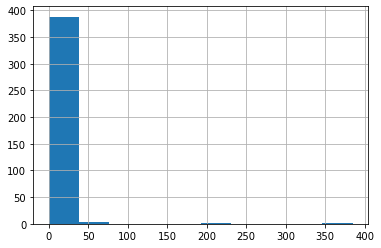

In [ ]:
stud.absences.hist()
pd.DataFrame(stud.absences.describe())

In [ ]:
# Очевидно, что в данном столбце имеется большой разброс данных и максимальное значение 
# "Количество пропущенных занятий" равное 385 не может быть реальным.
# Так как среднее значение и стандартное отклонение приблизительно равны 7 и 23 соответственно, рассмотрим гистограмму и
# рассчитаем межквартильный размах в диапозоне от 0 до 30.

25-й перцентиль: 0.0, 75-й перцентиль: 8.0,  IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


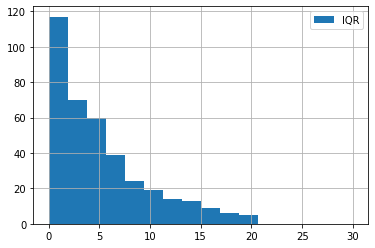

In [ ]:
get_dif_quant('absences', 0, 30)

In [ ]:
# Верхняя граница выброса равна 20, отфильтруем данные с учетом "здравого смысла" (нижнюю границу не учитываем),
# то есть "Количество пропущенных занятий" не более 20

In [ ]:
stud = stud.loc[stud.absences <= 20]

In [ ]:
# После фильтрации датафрейма, применив pd.describe видим, что отсеяли только 4,6% данных
# 95,4% школьников имели "Количество пропущенных занятий" не более 20

In [ ]:
pd.DataFrame(stud.absences.describe())

,absences
count,376.000000
mean,4.585106
std,4.942679
min,0.000000
25%,0.000000
50%,4.000000
75%,7.000000
max,20.000000


# рассмотрим столбец score

In [ ]:
# данный столбец содержит большое количество значений, поэтому посмотрим распределение значений (hist, describe)

,score
count,384.000000
mean,52.437500
std,23.188663
min,0.000000
25%,43.750000
50%,55.000000
75%,70.000000
max,100.000000


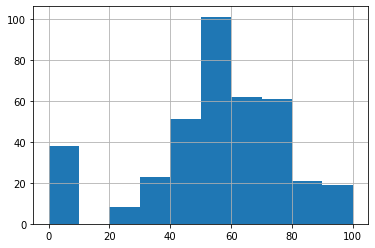

In [ ]:
stud.score.hist()
pd.DataFrame(stud.score.describe())

In [ ]:
# Из гистограммы видно, что основное распределение "Баллов по математике" лежит между 20 и 100 баллами. Очевидно, 
# имеется явный выброс (0 баллов). Такое количество школьников не могло получить 0 баллов. Рассчитаем межквартильный размах.

25-й перцентиль: 43.75, 75-й перцентиль: 70.0,  IQR: 26.25,  Границы выбросов: [4.375, 109.375].


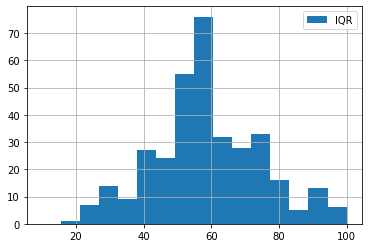

In [ ]:
get_dif_quant('score', 10, 100)

In [ ]:
# С учетом, что баллы являются целыми числами и не может быть более 100 баллов (верхняя граница 109)
# Отфильтруем данные с нижней границей 5 баллов.

In [ ]:
stud = stud.loc[stud.score >= 5]

In [ ]:
pd.DataFrame(stud.score.describe())

,score
count,338.000000
mean,58.106509
std,15.982944
min,25.000000
25%,50.000000
50%,55.000000
75%,70.000000
max,100.000000


# Корреляционный анализ

In [ ]:
# Корреляции рассмотрим только для числовых столбцов. Так как имеется большое количество числовых столбцов, то
# будем использовать матрицу корреляций

In [ ]:
stud.corr()

,age,medu,fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.163755,-0.147148,0.138516,0.008620,0.244073,-0.008620,0.072882,0.039981,0.146050,-0.044028,0.190124,-0.117150
medu,-0.163755,1.000000,0.576560,-0.179193,0.089488,-0.223190,-0.089488,-0.011550,0.025127,0.071071,-0.027906,0.022633,0.188862
fedu,-0.147148,0.576560,1.000000,-0.173039,-0.016892,-0.288255,0.016892,-0.021917,-0.026903,0.042193,0.027286,-0.024588,0.093389
traveltime,0.138516,-0.179193,-0.173039,1.000000,-0.106368,0.161080,0.106368,-0.002756,0.012064,0.050871,-0.009316,-0.017592,-0.099678
studytime,0.008620,0.089488,-0.016892,-0.106368,1.000000,-0.131901,-1.000000,0.009850,-0.125654,-0.003141,-0.098436,-0.076158,0.155337
failures,0.244073,-0.223190,-0.288255,0.161080,-0.131901,1.000000,0.131901,0.036127,0.099101,0.127220,0.052888,0.152733,-0.246575
studytime_granular,-0.008620,-0.089488,0.016892,0.106368,-1.000000,0.131901,1.000000,-0.009850,0.125654,0.003141,0.098436,0.076158,-0.155337
famrel,0.072882,-0.011550,-0.021917,-0.002756,0.009850,0.036127,-0.009850,1.000000,0.161889,0.027652,0.083045,-0.101380,0.058341
freetime,0.039981,0.025127,-0.026903,0.012064,-0.125654,0.099101,0.125654,0.161889,1.000000,0.246283,0.090417,0.081647,0.004081
goout,0.146050,0.071071,0.042193,0.050871,-0.003141,0.127220,0.003141,0.027652,0.246283,1.000000,0.012029,0.109920,-0.146333


In [ ]:
# Относительно признака score выделяются факторы absences и failures с коэффициентами приблизительно одинаковыми,
# тогда можем исключить один из этих факторов, например absences. Также на признак влияют в меньшей степени неизвестный
# фактор studytime_granular, факторы goout, studytime, medu.
# Факторы goout, medu оставляем для построения дальнейшей модели.
# Что интересно, studytime_granular является противоположностью studytime (коэффициенты 1 и -1).
# Исключим неизвестный studytime_granular

# Анализ номинативных переменных

In [ ]:
# C помощью box-plot будем анализировать распределение баллов в зависимости от значения номинативных переменных

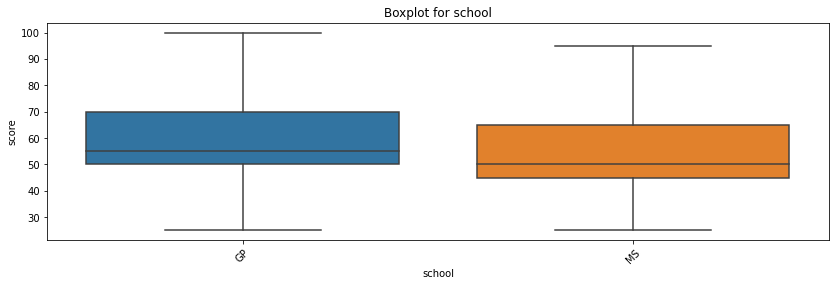

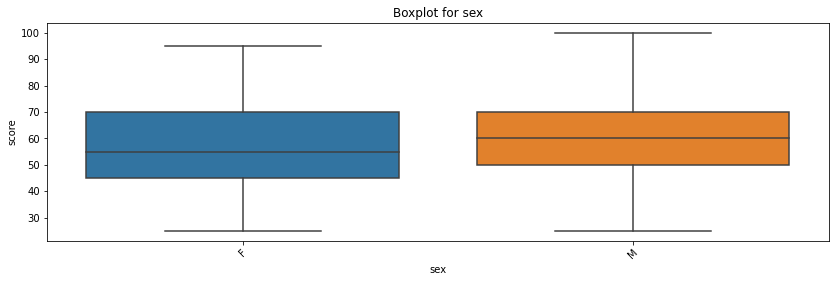

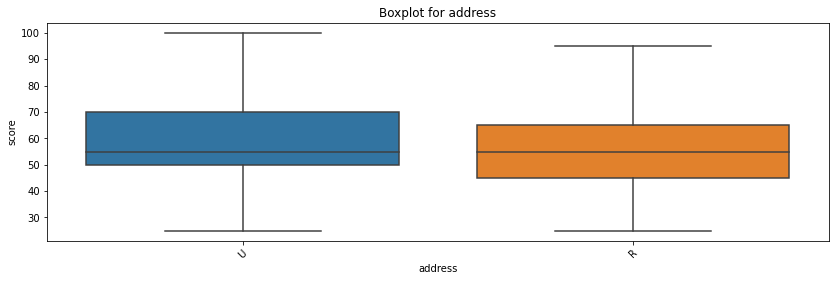

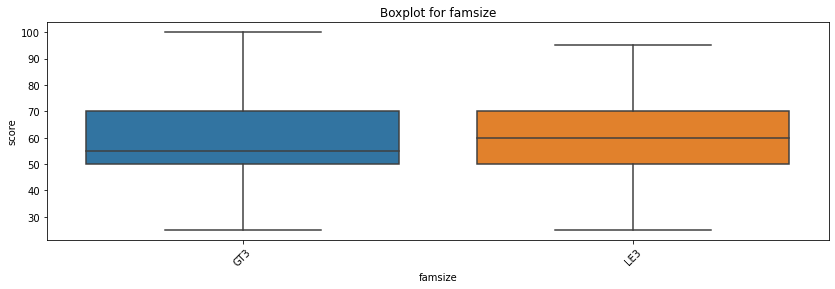

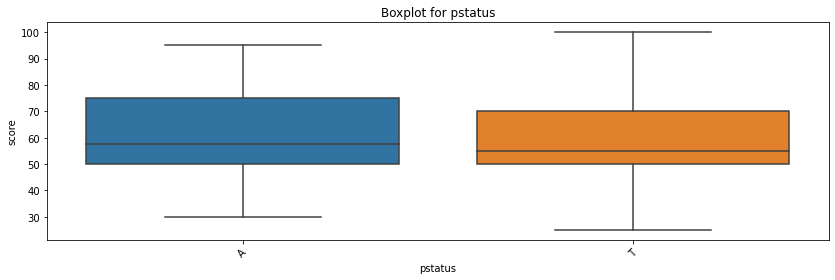

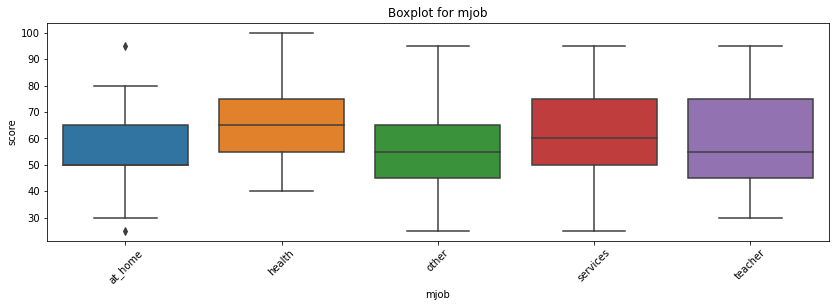

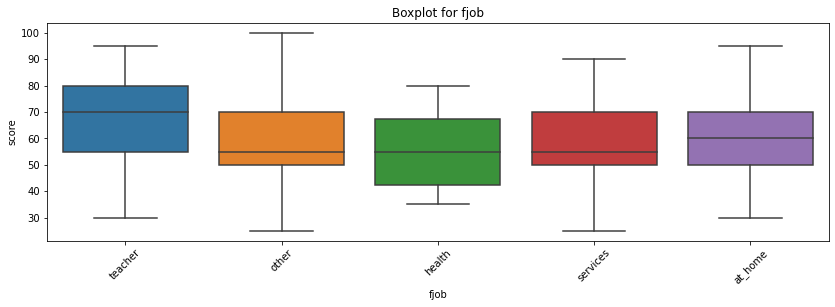

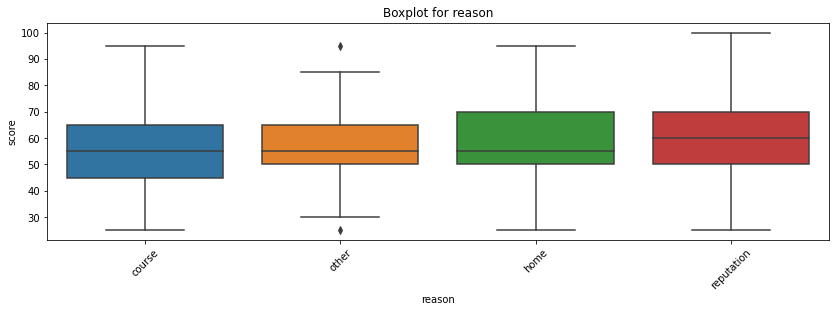

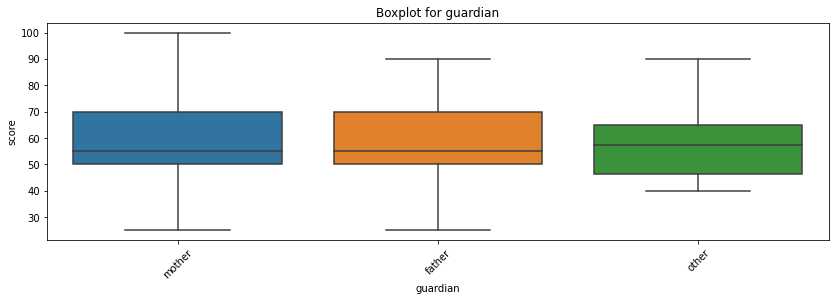

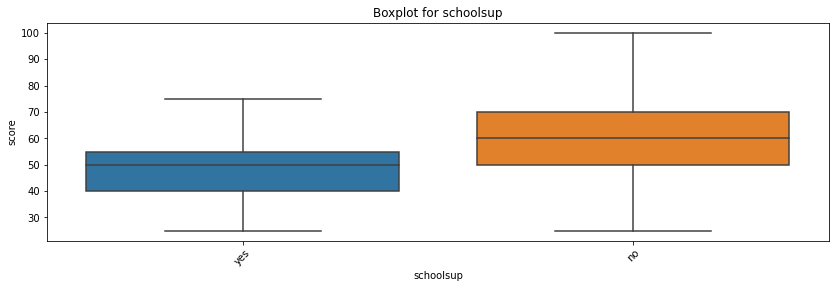

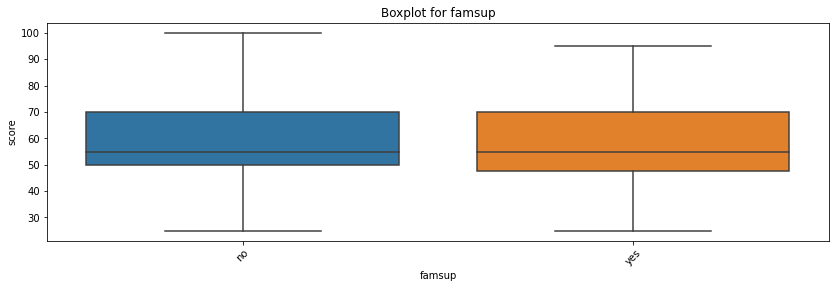

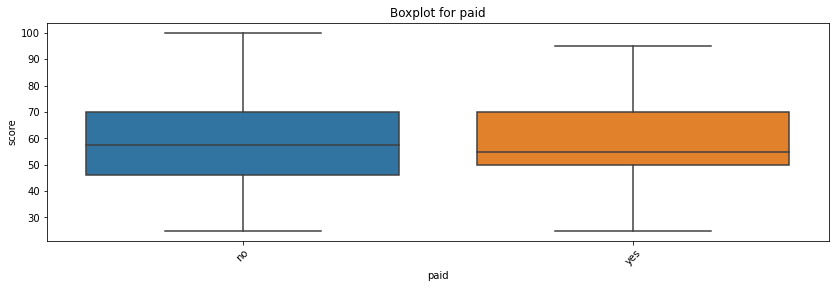

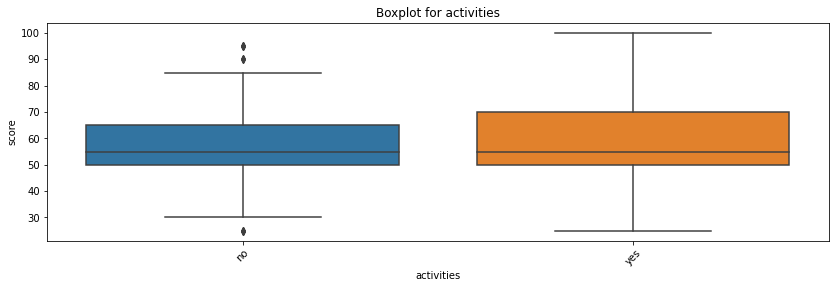

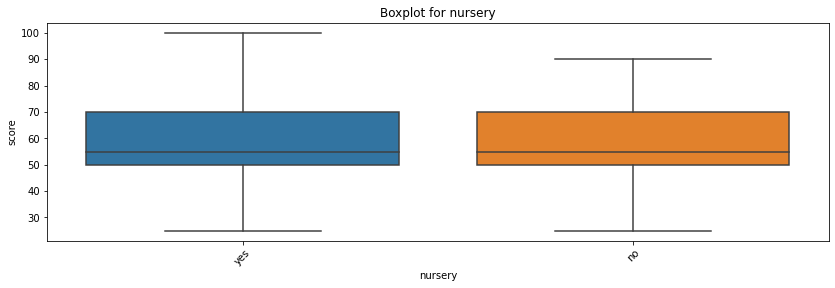

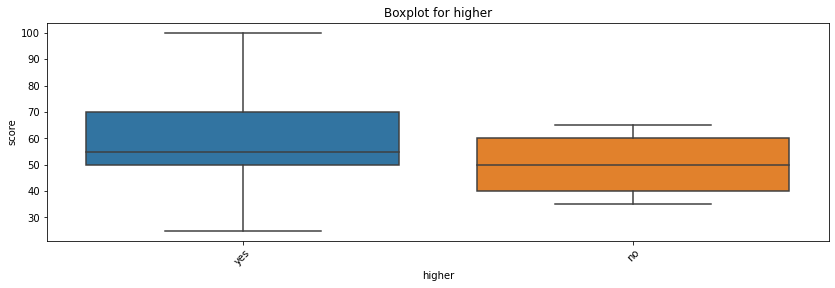

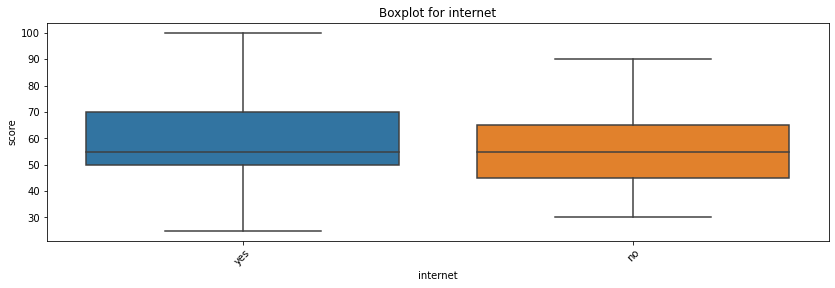

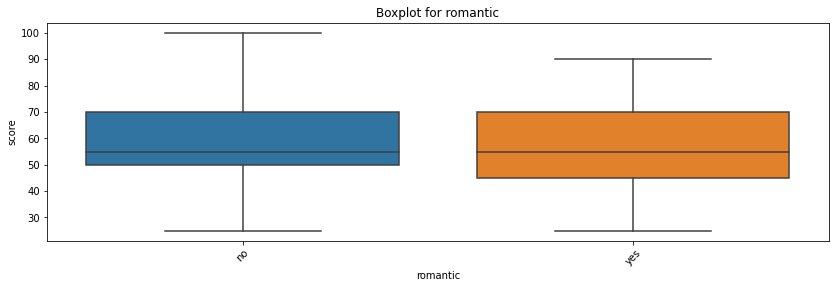

In [ ]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian', 'schoolsup',
           'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

In [ ]:
# По box-plot явно выделяются факторы: schoolsup и higher. Однако, проверим, есть ли статистическая разница
# в распределении баллов по номинативным признакам, с помощью теста Стьюдента.

# Статистические данные с помощью теста Стьюдента

In [ ]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian', 'schoolsup',
           'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки schoolsup


In [ ]:
# Найдены статистически значимые различия фактора schoolsup, влияющий на score, значит оставляем для построения 
# дальнейшей модели.

# ИТОГ

In [ ]:
# Переменные, влияющие на успеваемость, в данном случае, на баллы экзаменов по математике:
# failures, goout, medu, studytime и schoolsup.
# Создадим новый датафрейм с отфильтрованными данными

In [ ]:
stud_for_model = stud.loc[:, ['failures', 'goout', 'medu', 'studytime', 'schoolsup']].copy()

In [ ]:
stud_for_model.head(50)

,failures,goout,medu,studytime,schoolsup
0,0.0,4.0,4.0,2.0,yes
1,0.0,3.0,1.0,2.0,no
2,3.0,2.0,1.0,2.0,yes
3,0.0,2.0,4.0,3.0,no
4,0.0,2.0,3.0,2.0,no
5,0.0,2.0,4.0,2.0,no
6,0.0,4.0,2.0,2.0,no
7,0.0,4.0,4.0,2.0,yes
8,0.0,2.0,3.0,2.0,no
9,0.0,1.0,3.0,2.0,no
